**Applied Machine Learning - Homework 5 - Task2**


Amaury Sudrie (UNI: AS5961)
Maxime Tchibozo (UNI: MT3390)

Foreword: Some of the methods used in this notebook are highly computationally and memory intensive. To run this code, we used Google Colab notebooks, and we encourage you to do the same.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.regularizers import l2 as L2_reg

Using TensorFlow backend.


## Task 2

Train a multilayer perceptron (fully connected) on the Fashion MNIST dataset using the  traditional train/test split as given by fashion_mnist.load_data in keras. 

Use a separate 10000  samples (from the training set) for model selection and to compute learning curves (accuracy  vs epochs, not accuracy vs n_samples). 

Compare a “vanilla” model with a model using  drop-out and evaluate if using drop-out allows you to learn a bigger network. 

Then, compare to  a model using batch normalization. Visualize learning curves for all models

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

X_train2, X_valid, y_train2, y_valid = train_test_split(X_train, y_train, test_size=10000)

11493376/11490434 [==============================] - 1s 0us/step
60000 train samples
10000 test samples


### **A vanilla model**

First, we build a very simple model, composed on only one hidden layer. The number of weights is chosen at 256 to be something in between the input shape 784 and the output shape 10.

In [0]:
vanilla_model = Sequential()
vanilla_model.add(Dense(256, input_shape=(784,), activation='relu'))
vanilla_model.add(Dense(10, activation='softmax'))

vanilla_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

fit_vanilla = vanilla_model.fit(X_train2, y_train2, batch_size=64, epochs=15, verbose=1, validation_data=(X_valid, y_valid))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 3s 53us/step - loss: 0.2796 - accuracy: 0.9200 - val_loss: 0.1594 - val_accuracy: 0.9510
Epoch 2/15
50000/50000 [==============================] - 3s 50us/step - loss: 0.1180 - accuracy: 0.9653 - val_loss: 0.1130 - val_accuracy: 0.9671
Epoch 3/15
50000/50000 [==============================] - 3s 52us/step - loss: 0.0793 - accuracy: 0.9764 - val_loss: 0.0911 - val_accuracy: 0.9728
Epoch 4/15
50000/50000 [==============================] - 3s 51us/step - loss: 0.0574 - accuracy: 0.9831 - val_loss: 0.0826 - val_accuracy: 0.9744
Epoch 5/15
50000/50000 [==============================] - 3s 52us/step - loss: 0.0419 - accuracy: 0.9884 - val_loss: 0.0859 - val_accuracy: 0.9727
Epoch 6/15
50000/50000 [==============================] - 3s 51us/step - loss: 0.0319 - accuracy: 0.9906 - val_loss: 0.0809 - val_accuracy: 0.9759
Epoch 7/15
50000/50000 [==============================] - 3s 51us/st

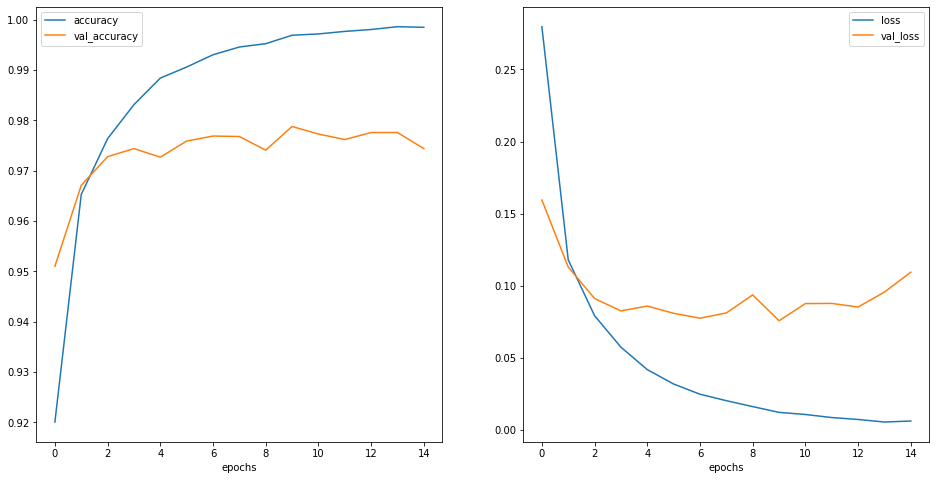

In [0]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

pd.DataFrame(fit_vanilla.history)[["accuracy", "val_accuracy"]].plot(ax=ax[0])
pd.DataFrame(fit_vanilla.history)[["loss", "val_loss"]].plot(ax=ax[1])
ax[0].set_xlabel("epochs")
ax[1].set_xlabel("epochs")
plt.show()

The vanilla model starts to overfit after 3-4 epochs of training (the train accuracy is still improving while the validation one is stagnating). Nonethless the accuracy keep increasing to almost 97.9% of accuracy on the validation dataset.

### **Using Dropout**

Now let's use dropout.
Dropout might late the overfitting. Thus we add more epochs of training.

In [0]:
dropout_model = Sequential()
dropout_model.add(Dense(256, input_shape=(784,), activation='relu'))
dropout_model.add(Dropout(0.4))
dropout_model.add(Dense(64, activation='relu'))
dropout_model.add(Dropout(0.4))
dropout_model.add(Dense(10, activation='softmax'))

dropout_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

fit_dropout = dropout_model.fit(X_train2, y_train2, batch_size=64, epochs=25, verbose=1, validation_data=(X_valid, y_valid))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 4s 87us/step - loss: 0.4643 - accuracy: 0.8594 - val_loss: 0.1638 - val_accuracy: 0.9503
Epoch 2/25
50000/50000 [==============================] - 4s 86us/step - loss: 0.2260 - accuracy: 0.9344 - val_loss: 0.1219 - val_accuracy: 0.9635
Epoch 3/25
50000/50000 [==============================] - 4s 83us/step - loss: 0.1760 - accuracy: 0.9498 - val_loss: 0.1073 - val_accuracy: 0.9671
Epoch 4/25
50000/50000 [==============================] - 4s 83us/step - loss: 0.1481 - accuracy: 0.9572 - val_loss: 0.0967 - val_accuracy: 0.9708
Epoch 5/25
50000/50000 [==============================] - 4s 84us/step - loss: 0.1269 - accuracy: 0.9630 - val_loss: 0.0902 - val_accuracy: 0.9720
Epoch 6/25
50000/50000 [==============================] - 4s 85us/step - loss: 0.1186 - accuracy: 0.9647 - val_loss: 0.0918 - val_accuracy: 0.9733
Epoch 7/25
50000/50000 [==============================] - 4s 85us/st

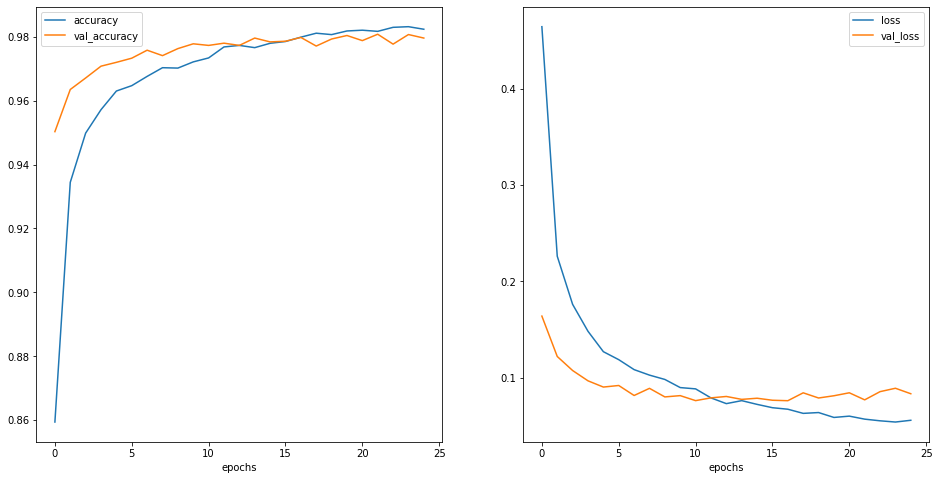

In [0]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

pd.DataFrame(fit_dropout.history)[["accuracy", "val_accuracy"]].plot(ax=ax[0])
pd.DataFrame(fit_dropout.history)[["loss", "val_loss"]].plot(ax=ax[1])
ax[0].set_xlabel("epochs")
ax[1].set_xlabel("epochs")
plt.show()

Our bigger model is better than the vanilla one with almost 98.1% of accuracy on the validation dataset.

Here we can see that dropout prevents overfitting to some extent. Investigating the loss plot reveals that the model starts overfitting only at epochs 12-13.


Now let's compare to the same Network without dropout.

In [0]:
wodropout_model = Sequential()
wodropout_model.add(Dense(256, input_shape=(784,), activation='relu'))
wodropout_model.add(Dense(64, activation='relu'))
wodropout_model.add(Dense(10, activation='softmax'))

wodropout_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

fit_wodropout = wodropout_model.fit(X_train2, y_train2, batch_size=64, epochs=15, verbose=1, validation_data=(X_valid, y_valid))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 4s 87us/step - loss: 0.2637 - accuracy: 0.9233 - val_loss: 0.1425 - val_accuracy: 0.9580
Epoch 2/15
50000/50000 [==============================] - 4s 83us/step - loss: 0.1034 - accuracy: 0.9685 - val_loss: 0.1005 - val_accuracy: 0.9693
Epoch 3/15
50000/50000 [==============================] - 4s 83us/step - loss: 0.0677 - accuracy: 0.9795 - val_loss: 0.0793 - val_accuracy: 0.9757
Epoch 4/15
50000/50000 [==============================] - 4s 80us/step - loss: 0.0480 - accuracy: 0.9848 - val_loss: 0.0849 - val_accuracy: 0.9741
Epoch 5/15
50000/50000 [==============================] - 4s 81us/step - loss: 0.0385 - accuracy: 0.9875 - val_loss: 0.0771 - val_accuracy: 0.9773
Epoch 6/15
50000/50000 [==============================] - 4s 80us/step - loss: 0.0277 - accuracy: 0.9910 - val_loss: 0.0943 - val_accuracy: 0.9738
Epoch 7/15
50000/50000 [==============================] - 4s 82us/st

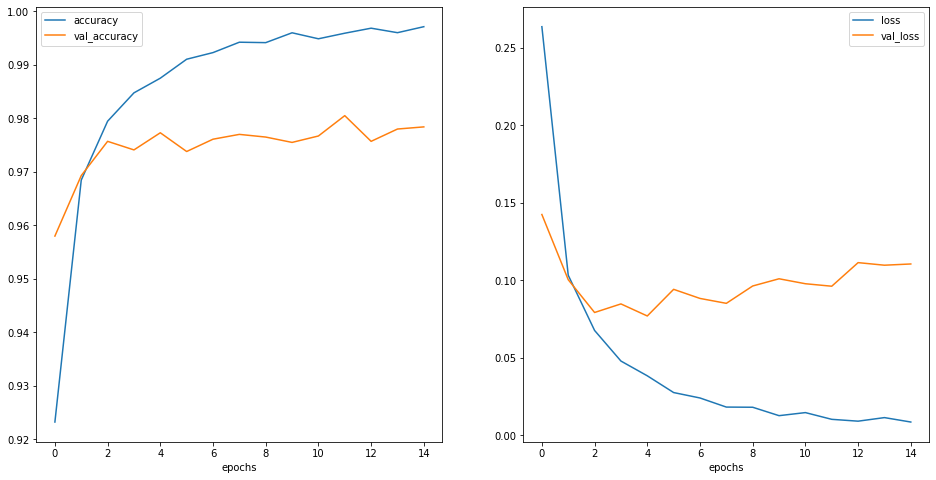

In [0]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

pd.DataFrame(fit_wodropout.history)[["accuracy", "val_accuracy"]].plot(ax=ax[0])
pd.DataFrame(fit_wodropout.history)[["loss", "val_loss"]].plot(ax=ax[1])
ax[0].set_xlabel("epochs")
ax[1].set_xlabel("epochs")
plt.show()

Even if the Network achieve a bit more than 98% of accuracy on the validation dataset it completely overfits after epochs 4-5 around 97.5%. In other words if we don't stop the training to a very good validation accuracy, without dropout the model tends to be worse than to the vanilla model.

### **Using Batch Normalization**

Now let's use Batch Normalization

In [0]:
BN_model = Sequential()
BN_model.add(Dense(256, input_shape=(784,), activation='relu'))
BN_model.add(BatchNormalization())
BN_model.add(Dense(64, activation='relu'))
BN_model.add(BatchNormalization())
BN_model.add(Dense(10, activation='softmax'))

BN_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

fit_BN = BN_model.fit(X_train2, y_train2, batch_size=64, epochs=15, verbose=1, validation_data=(X_valid, y_valid))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 5s 95us/step - loss: 0.2338 - accuracy: 0.9317 - val_loss: 0.1321 - val_accuracy: 0.9619
Epoch 2/15
50000/50000 [==============================] - 4s 89us/step - loss: 0.1009 - accuracy: 0.9698 - val_loss: 0.1130 - val_accuracy: 0.9663
Epoch 3/15
50000/50000 [==============================] - 4s 89us/step - loss: 0.0729 - accuracy: 0.9776 - val_loss: 0.1075 - val_accuracy: 0.9665
Epoch 4/15
50000/50000 [==============================] - 4s 90us/step - loss: 0.0542 - accuracy: 0.9828 - val_loss: 0.1105 - val_accuracy: 0.9664
Epoch 5/15
50000/50000 [==============================] - 4s 89us/step - loss: 0.0461 - accuracy: 0.9851 - val_loss: 0.0912 - val_accuracy: 0.9726
Epoch 6/15
50000/50000 [==============================] - 4s 89us/step - loss: 0.0395 - accuracy: 0.9868 - val_loss: 0.1001 - val_accuracy: 0.9715
Epoch 7/15
50000/50000 [==============================] - 4s 88us/st

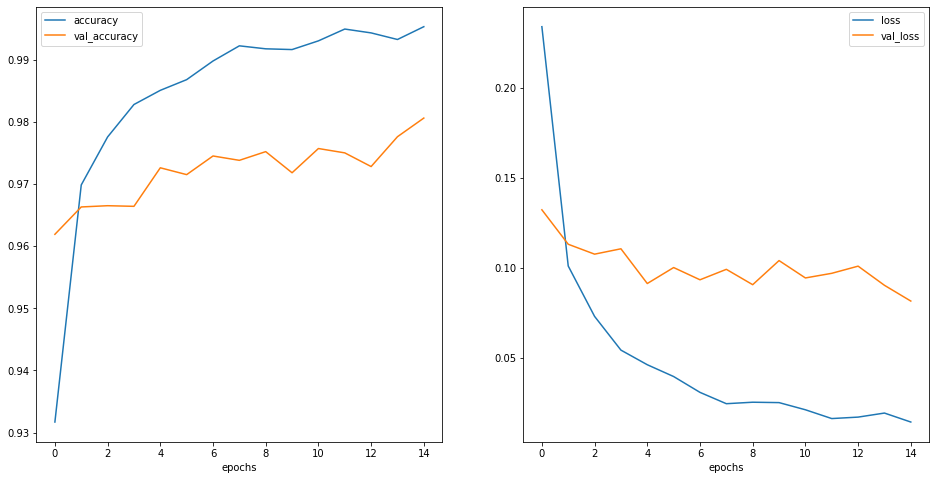

In [0]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

pd.DataFrame(fit_BN.history)[["accuracy", "val_accuracy"]].plot(ax=ax[0])
pd.DataFrame(fit_BN.history)[["loss", "val_loss"]].plot(ax=ax[1])
ax[0].set_xlabel("epochs")
ax[1].set_xlabel("epochs")
plt.show()

Even if the Network with Batch Normalization achive almost 98.1% of accuracy on the validation dataset it overfits after epochs 4-5 around 97.5%. In other words if we don't stop the training to a very good validation accuracy, the batch norm model tends to be worse than to the vanilla model.